# 1. Philosophy, overview, directory, simulation


## 1.0 Entry poll

Please respond to the brief `entry survey` that helps us better understand what your needs might be in week one. I'll launch it on [zoom](https://jhjhm.zoom.us/j/93892874220) for both the in-person and virtual attendees. The questions are listed here for your convenience. An identical `exit survey` will be launched in week-five to get a sense of what we've achieved over a five-week period. Our goal is to "titrate" the challenges we present to you each week against your skill-level, to ensure a smooth process of [growth](https://jhufena.github.io/home/preface.html) (a.k.a, [flow)](https://en.wikipedia.org/wiki/Relaxation_(psychology)) over the next eight weeks.

### 1.0.1 Survey 

1. How will you use Stata from 04/01/2024-05/17/2024?        
     
   + Locally on my laptop
   + Remotely on another desktop or terminal         
     
2. What operating system will you use locally or remotely?      
         
   + MacOSX
   + Unix
   + Windows     

3. Do you have any experience using Stata, SAS, R, Python, or any other statistical software?     
     
   0. **No Experience.** I have no prior experience with Stata and am unfamiliar with the software. Also, I have no experience with other statistical software such as SAS, R, Python, etc.     
   1. **Basic Knowledge.** I have a general understanding of basic commands but I require asistance to perform tasks.
   2. **Novice User.** I am familiar with basic commands and can import data and do basic data cleaning. But I require guidance for more complex analyses.
   3. **Competent User.** I am proficient in using Stata, SAS, R, Python, etc. for data exploration, descriptive statistics, basic inference (t-tests, chi-square tests), and regression
   4. **Advanced User.** I can do multivariable regression and understand various statistical modeling options and techniques available in Stata, SAS, R, etc.
   5. **Expert User.** I can write custom programs, macros, ado-files in Stata. Or I am an expert user of SAS, R, Python, etc. but have little to no experience with Stata.

### 1.0.2 Results
Results of entry poll are [here](https://raw.githubusercontent.com/jhustata/intermediate/main/entry_poll.csv). And a detailed Stata analysis of these results can be found [here](entry_poll.md)

#### From a simulation
I planned the first two sessions of this class based on assumptions about your skill levels. One doesn't always have the luxury of real data. But decisions must be made.


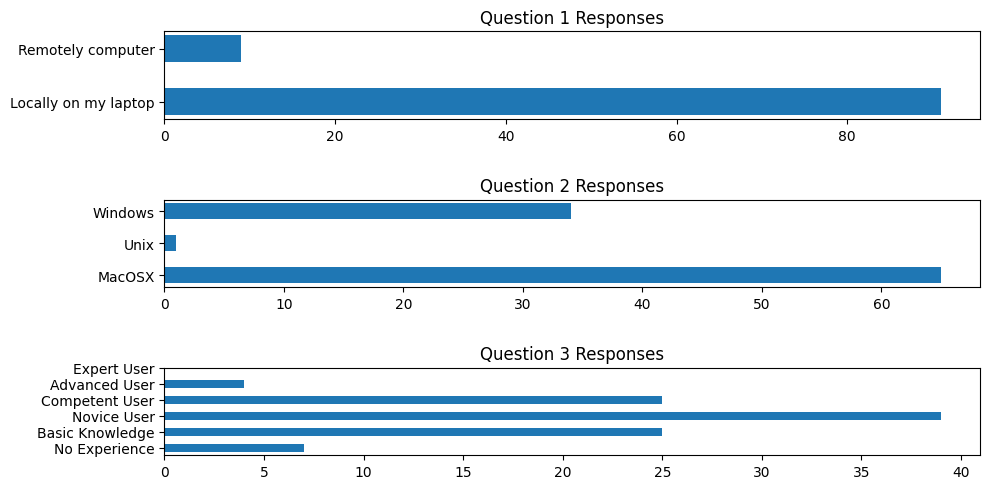

In [2]:
# House cleaning
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 1, figsize=(10, 5))

# Adjust the height of bars here
bar_height = 0.5

#
# Set the random seed for reproducibility
np.random.seed(0)

# Simulate responses for question 1 (Stata usage location)
q1_responses = np.random.choice(['Locally on my laptop', 'Remote computer'], 100, p=[0.9, 0.1])

# Simulate responses for question 2 (Operating system)
q2_responses = np.random.choice(['MacOSX', 'Unix', 'Windows'], 100, p=[0.67, 0.01, 0.32])

# Simulate responses for question 3 (Experience level)
# Assuming a mean experience level of 2 (Novice User) with a standard deviation of 1
q3_responses = np.random.normal(loc=2, scale=1, size=100)
# Ensure the experience level is within the 0 to 5 range and round to the nearest integer
q3_responses = np.clip(q3_responses, 0, 5).round().astype(int)

# Question 1
q1_values, q1_counts = np.unique(q1_responses, return_counts=True)
axs[0].barh(q1_values, q1_counts, height=bar_height)
axs[0].set_title('Question 1 Responses')
axs[0].set_xlabel(' ') # Number of Responses

# Question 2
q2_values, q2_counts = np.unique(q2_responses, return_counts=True)
axs[1].barh(q2_values, q2_counts, height=bar_height)
axs[1].set_title('Question 2 Responses')

# Question 3
q3_values, q3_counts = np.unique(q3_responses, return_counts=True)
axs[2].barh(q3_values, q3_counts, height=bar_height)
axs[2].set_title('Question 3 Responses')
axs[2].set_ylabel(' ') # Experience Level
axs[2].set_yticks(range(6))
axs[2].set_yticklabels(['No Experience', 'Basic Knowledge', 'Novice User', 'Competent User', 'Advanced User', 'Expert User'])

plt.tight_layout()
plt.show()


#### From zoom Poll

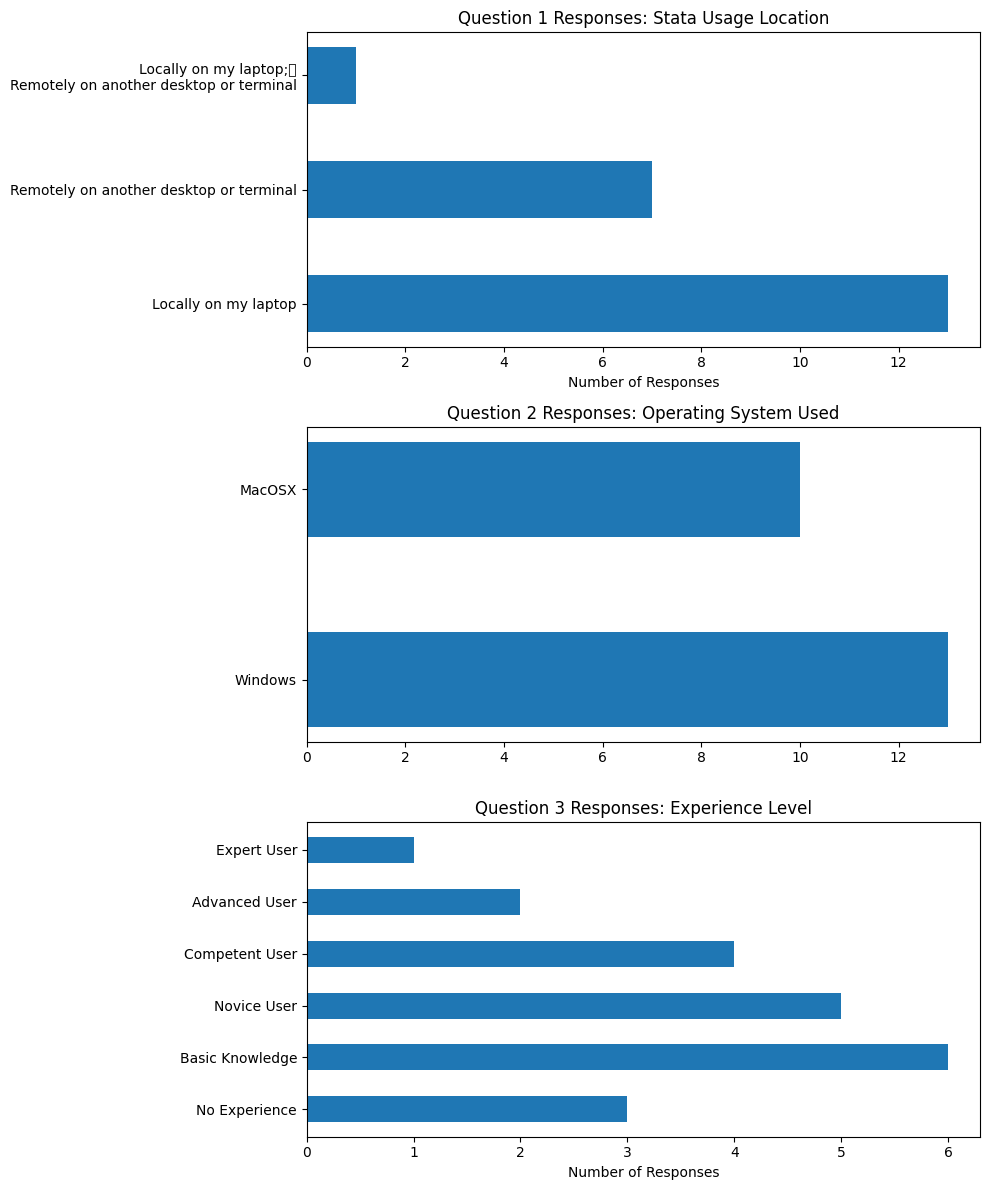

In [7]:
# This fixed it
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import io


# Load the CSV file to examine its structure
url = 'https://raw.githubusercontent.com/jhustata/intermediate/main/entry_poll.csv'
data_path = '~/documents/github/statatwo/entry_poll.csv'
survey_data = pd.read_csv(data_path)



# Ignore specific matplotlib warnings
warnings.filterwarnings("ignore", message="Glyph 13 missing from current font.")

# Data processing for visualization

# Question 1: Stata usage location
q1_data = survey_data['How will you use Stata from 03/26/2024-05/17/2024?']
q1_counts = q1_data.value_counts()

# Question 2: Operating system usage, handling multiple selections
# Splitting the responses on ';' and flattening the list
q2_data_split = survey_data['What operating system will you use locally or remotely?'].str.split(';').explode()
q2_counts = q2_data_split.str.strip().value_counts()

# Question 3: Experience level, translating text responses into numeric levels
experience_mapping = {
    'No Experience.': 0,
    'Basic Knowledge.': 1,
    'Novice User.': 2,
    'Competent User.': 3,
    'Advanced User.': 4,
    'Expert User.': 5
}

# Extract the first part of each response to map to the numeric values
q3_data_mapped = survey_data['Do you have any experience using Stata, SAS, R, Python, or any other statistical software?']\
                    .str.split('.').str[0] + '.'
q3_data_numeric = q3_data_mapped.map(experience_mapping)
q3_counts = q3_data_numeric.value_counts().sort_index()

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

bar_height = 0.5

# Question 1
axs[0].barh(q1_counts.index, q1_counts.values, height=bar_height)
axs[0].set_title('Question 1 Responses: Stata Usage Location')
axs[0].set_xlabel('Number of Responses')

# Question 2
axs[1].barh(q2_counts.index, q2_counts.values, height=bar_height)
axs[1].set_title('Question 2 Responses: Operating System Used')

# Question 3
axs[2].barh(q3_counts.index, q3_counts.values, height=bar_height)
axs[2].set_title('Question 3 Responses: Experience Level')
axs[2].set_xlabel('Number of Responses')
axs[2].set_yticks(range(6))
axs[2].set_yticklabels(['No Experience', 'Basic Knowledge', 'Novice User', 'Competent User', 'Advanced User', 'Expert User'])

plt.tight_layout()

# Instead of plt.show(), save the plot to a BytesIO object and display it inline
buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight')
buf.seek(0)
display(Image(buf.getvalue()))

# It's important to close the plt object to free up memory
plt.close(fig)





<details>
   <summary><b>GPT-4 Assisted Analysis</b></summary>

GPT-4 produced this analysis in less than a minute. It's virtually impossible for you to replicate that speed and accuracy, as we'll see [shortly](entry_poll.md)

   <iframe width="560" height="315" src="https://www.youtube.com/embed/pi6aJnoT8dM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

</details>

### 1.0.3 Understanding Format Specifiers: `%9s`

To seamlessly integrate external data into our analysis, let's start by importing a .csv file directly into Stata. Pay close attention to the variable types discussed in the following section: [Understanding Variable Types](https://jhustata.github.io/basic/chapter1.html#variable-types).

```stata
import delimited "https://raw.githubusercontent.com/jhustata/intermediate/main/entry_poll.csv", clear 
```

   - For a comprehensive guide on this command, type `help import delimited`.
   - Within *import_delimited_options*, focus on the "<u>varn</u>ames" option.
   - Consider this: if the first row of your dataset includes variable names, how should you proceed?

```stata
import delimited "https://raw.githubusercontent.com/jhustata/basic/main/entry_poll.csv", clear varn(1)
```

For those navigating Stata's syntax for the first time, remember that any argument following a comma is known as an `option`. This grants considerable flexibility in data importation, analysis, and output generation. As you develop your programming skills, you'll learn to offer similar flexibility to your users by incorporating customizable options into your scripts.

Can you challenge yourself to create a bar graph with the imported data? Data can be numeric or string – how do we determine the nature of our dataset?

```stata
describe
```

Identify the format of your variables. Need a hint? Revisit the section [1.2 Overview](https://jhustata.github.io/intermediate/chapter1.html#variable-types).

For a thorough analysis using Stata on this dataset, refer to [this detailed examination](entry_poll.md).


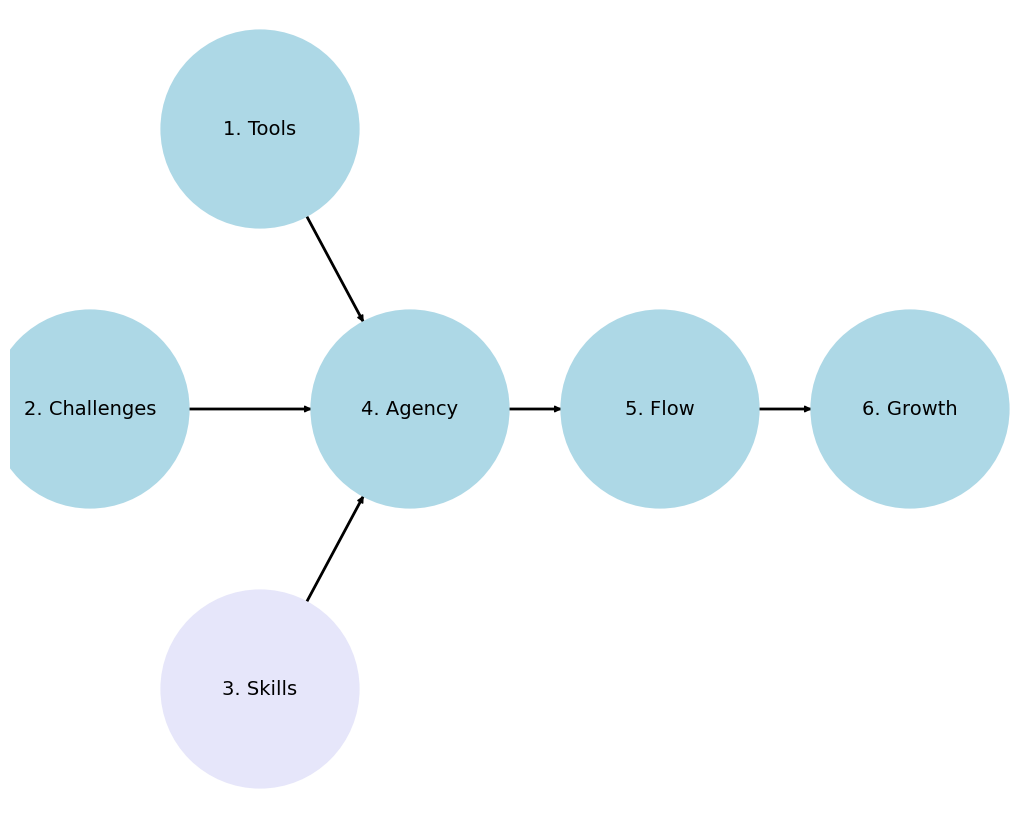

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("1. Root", pos=(-2500, 700))
G.add_node("2. Pentatonic", pos=(-4200, 0))
G.add_node("3. Diatonic", pos=(-2500, -700))
G.add_node("4. Chromatic", pos=(-1000, 0))
G.add_node("5. Temperament", pos=(1500, 0))
G.add_node("6. Expression", pos=(4000, 0))

G.add_edges_from([("1. Root", "4. Chromatic")])
G.add_edges_from([("2. Pentatonic", "4. Chromatic")])
G.add_edges_from([("3. Diatonic", "4. Chromatic")])
G.add_edges_from([("4. Chromatic", "5. Temperament")])
G.add_edges_from([("5. Temperament", "6. Expression")])

pos = nx.get_node_attributes(G, 'pos')
labels = {"4. Chromatic": "4. Agency",
          "1. Root": "1. Tools",
          "2. Pentatonic": "2. Challenges",
          "3. Diatonic": "3. Skills",
          "5. Temperament": "5. Flow",
          "6. Expression": "6. Growth"}  # Added label for "NDI" node in the labels dictionary

# Update color for the "Scenarios" node
node_colors = ["lightblue","lightblue", "lavender", "lightblue", "lightblue", "lightblue"]
# node_colors = ["lightblue","lavender", "lavender", "lightgreen", "lightpink", "lightpink"]
# Suppress the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=20000, node_color=node_colors, linewidths=2, edge_color='black', style='solid')
nx.draw_networkx_labels(G, pos, labels, font_size=14) # , font_weight='bold'
nx.draw_networkx_edges(G, pos, edge_color='black', style='solid', width=2)
plt.xlim(-5000, 5000)
plt.ylim(-1000, 1000)
plt.axis("off")
plt.show()

## 1.1 Philosophy

Diving into Stata for data analysis and statistical programming, we embrace a philosophy that's rooted in practicality and deep contemplation.

### 1.1.1 Receive & with Simplicity
1. Tools
   - Workstation
      - Remote Access: Utilize Terminal or [Safe Desktop](https://ictr.johnshopkins.edu/service/informatics/safe-desktop/) for secure, remote operations.
      - Local Setup: [Download Stata](https://download.stata.com/download/) directly onto your personal computer.
   - Installation  
      - Visit download.stata.com for the setup files.
      - Username: 0123456789 (as provided in your email) – remember, it’s reusable for future Stata acquisitions.
      - Password: Create a secure one of your choosing (`$3(re+` as an example).
      - Serial number: Provided with your purchase, which could be for:
         - A perpetual license (higher cost)
         - A time-limited subscription (6 or 12 months)
      - Compatible Operating Systems: Windows, Mac, Linux (contact Stata for alternatives).
      - Choose Your Stata Packa`ge: Stata/MP, Stata/SE, Stata/BE, tailored to your needs like parallel processing support for Mac, including necessary files and documentation.
      - Ensure Stata can access your documents folder for seamless file management.

   - Courses
      - **340.600 Stata Programming I** (Basics)
      - **340.700 Stata Programming II** (Intermediate Level)
      - **340.800 Stata Programming III** (Advanced Mastery)

2. Challenges
   - [Foundational](https://jhufena.github.io/home/intro.html) Steps:
      - Introductory courses like Epi 750 series and Biostats 620 series.
   - Hopkins-Specific:
      - Engage with [Labs/Practice](https://jhustata.github.io/basic/quickrefs.html#labs-schedule), homework, capstones/theses, and course Biostats 140.624 for hands-on learning.
   - Real-World Applications:
      - Analyze data from [NHANES](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx) covering demographics, health questionnaires, nutrition, and more for practical insights into public health.
      - Work with national databases, clinical studies, and longitudinal cohorts for a broad exposure to data analysis.
   - Simulation for Skill Building:
      - Experiment with creating [Data](https://jhufena.github.io/home/act0/act_0_7/act_0_0_7_12.html) that mimics real databases to refine your Stata scripts.
      - Develop skills in randomization, handling missing data, bootstrapping, understanding cryptography/disclosure risks, calculating sample sizes, and more for versatile analytical capabilities.
      - Engage in adversarial training and use simulations for didactic purposes across various scenarios.

This structured approach not only builds foundational skills but also prepares you to tackle real-world challenges with confidence and creativity.
   
### 1.1.2 Know & be Reverent
3. **Skills**
   - **Analytical Thinking:** You are encouraged to not just learn Stata syntax but to understand the data you are working with. Stata is not just a tool but a gateway to meaningful insights. This class assumes that you have received some training in epidemiology and biostatistics and will not be emphasizing any of these points.
   - **Data Management Mastery:** Knowing how to efficiently clean, manipulate, and prepare data is sacred in the realm of statistical analysis. Treat each [dataset as a unique puzzle](https://jhustata.github.io/basic/quickrefs.html#datasets-and-supplementary-materials) that tells a story. I've two datasets that have the same information, but in different formats. From a technical perspective, there might be nuanced differences in the challenges you'll encounter while using one dataset compared with another.
      - [transplants.txt](https://raw.githubusercontent.com/jhustata/livre/main/transplants.txt)
      - [transplants.dta](https://jhustata.github.io/basic/_downloads/34a8255f06036b44354b3c36c5583d7e/transplants.dta)
   - **Statistical Techniques:** A reverent understanding of the statistical methods behind the commands is crucial but beyond the scope of this class. For instance, we will not discuss the relative merits of three approaches to survival analysis: non-parametric, semi-parametric, and parametric. This class assumes you know why and when to use each method. But we will provide you with the tools to do so efficiently.
4. **Agency**
   - **Self-directed Learning:** We hope you appreciate the value of exploration beyond the classroom. The most profound learning occurs through tackling real-world data challenges.
   - **Community Contribution:** Please engage with our new [Stata-focused community](https://github.com/jhufena/discussions/discussions), share knowledge, ask questions, and contribute solutions. Respect for the community's collective wisdom and the software's capabilities should guide your interactions.

### 1.1.3 Do & on Time
5. **Flow**
   - **Start with the Basics:** The [Basic](https://publichealth.jhu.edu/course/38901) class, as it's name suggests, emphasizes the importance of a strong foundation. Understanding the `basics` thoroughly ensures smoother progression to `intermediate` and `advanced` topics.
   - **Practical Applications:** If you need a real-world dataset (e.g. NHANES) for your Biostats 140.624 project, we'd be happy to facilitate you and help curate it for you. Hopefully this will foster a deeper understanding and appreciation of Stata's power.
   - **Iterative Learning:** Please use an iterative approach to all your labs and homeworks. The first attempt doesn't have to be perfect; learning comes from refinement and persistence.
6. **Growth**
   - **Feedback Loops:** Constructive feedback is sacred. So we are offering an [open environment](https://github.com/jhufena/discussions/discussions) where feedback is given and received, to promote continuous improvement and learning.
   - **Skill Expansion:** The course is structured to progressively challenge you with more complex problems and datasets. Growth in the realm of Stata Programming, and in any aspect of life in general, is about matching challenges with skills. But gradually and systematically increasing the challenges we present to you, and by offering you prompt feedback on your performance, we believe we'll nurture an environemnt that ensures growth in your skills.
   - **Lifelong Learning:** And remember that learning Stata, like any other skill, is a journey without an end. The landscape of data analysis is always evolving, and so should your skills and understanding. This is partly what motivated our new [Stata-focused community](https://github.com/jhufena/discussions/discussions) as well as our [general analytic community](https://jhufena.github.io/home/intro.html) that aims to discuss topics at the interface of Stata, R, Python, AI, code, version control, automation, open science, etc.


## 1.2 Overview &#129408;
     
*Ceci n'est pas une crabe* 

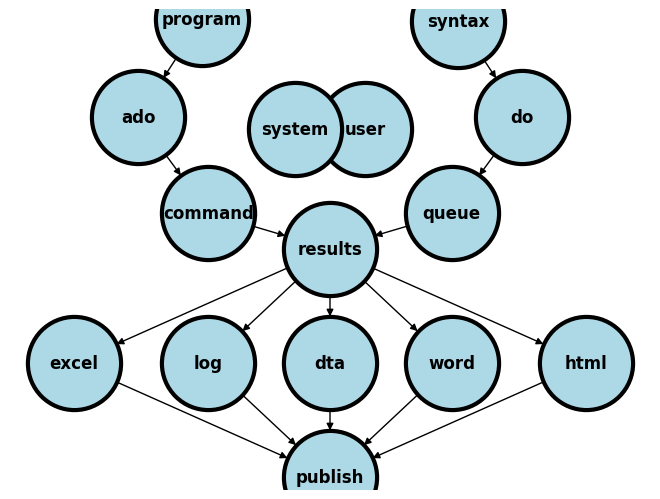

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

We are going to distinguish between two fundamental perspectives in this class:
 
+ System
   + Native (built-in stata application, support files, `.ado` files)
      + If you type `which help` into your command window you get something like: `/Applications/Stata/ado/base/h/help.ado`
   + [Third-party](https://raw.githubusercontent.com/jhustata/basic/main/table1_fena.ado) (typically `.ado` files)
      + When I type `which table1_fena` I get `/Applications/Stata/ado/base/t/table1_fena.ado`
   + Your `.ado` files (you'll learn to write & install your own programs)  
      + Since you don't have [table1_fena.ado](https://raw.githubusercontent.com/jhustata/intermediate/main/table1_fena.ado) installed you'll get `command table1_fena not found as either built-in or ado-file`  
        
+ User
   + Known
      + Instructor
      + Teaching assistants
      + Students
      + Collaborators

   + Unknown
      + Anticipate (emphathize with different kinds of users)
      + Share code (on GitHub, for instance)
      + Care (user-friendly, annotated code)

The `system` is the <u>Stata application</u> and its a simple noun. It is not <strike>STATA</strike>, which gives the impression of being an acronym. I presume you’ve all installed Stata onto your local machines. If not I presume you’ll be doing so very soon or you will be remotely accessing it. The `user` includes you, me, the teaching assistants, collaborators, or strangers.

As a user, you will or have already downloaded and installed a system of programs, mostly ado-files, which form the foundation of all the commands you will be using in Stata. These are the **native** Stata system files.

But soon you will begin to write your own Stata programs or `.ado` files and install them into the system folders (as I've done with `table1_fena.ado`). Then, it will be helpful to think of your role as part of the system. In your new role as system, it will be helpful to anticipate the needs of the known and unknown future users of your program. This will call for **empathy** (anticipating user needs), **sharing** (your code with others), and **caring** (that its user-friendly).
       
+ Installation
   + Local
      + MacOSX
      + Unix
      + Windows

   + Remote
      + Desktop
         + Windows
      + Cluster
         + Unix/Terminal
     
+ Local
   + [Menu](https://www.stata.com/manuals13/gsw2.pdf#gsw2TheStatauserinterface)
      + file 
      + edit
      + view
      + data 
      + graphics
      + statistics
      + user
      + window
         + command &#8984; 1
         + results &#8984; 2
         + history &#8984; 3
         + variables &#8984; 4
         + properties &#8984; 5
         + graph &#8984; 6
         + viewer &#8984; 7
         + editor &#8984; 8
         + do-file &#8984; 9
         + manager &#8984; 10
      + help
          
   + Command     
      + The very first `valid` word you type into the command window or on a line of code in a do file
         - Some [basic](https://www.stata.com/manuals13/u27.pdf) commands that the folks at Stata think you ought to know by the end of this class. Please keep checking 
         - In your week 1 lab you'll learn the `set` command, which is key to simulation and reproducibility 
      + Rendered blue in color if its a <u>native</u> Stata command (on my machine)
      + A <u>third-party</u> program/command appears white and may not work if you share your do file with others
      + Your collaborators, TAs, and instructors must be warned about the need to first install such third-party programs     
           
   + Syntax
      + The arrangement of words after a Stata command
      + Create well-formed instructions in Stata (i.e., the syntax of Stata)
      + Other terms or synonyms include code, Stata code, code snippet.        
           
   + Input
      + Menu (**see above:** a menu-driven task outputs command and syntax in the results window)
      + do files (Stata script with a sequence of commands; you can copy & paste some from the results window)
      + ado files (Stata script with a program or a series of programs for specific or general tasks)      
           
   + Output/Results   
      + String   
         + text (e.g., `str49` below = string of 49 characters <u>including spaces</u>) 
            + `The median age in this population is 40 years old`
         + url 
            + `https://www.stata-press.com/data/r8`
         + filepath 
            + `/users/d/desktop`
              
      + Numeric (types by range)
         + integer
            + `byte`: $-127$ to $100$ 
            + `int`: $-32767$ to $32740$
            + `long`: $\pm   2$ billion
         + decimal
            + `float`: $\pm   10^{38}$ billion
            + `double`: $\pm   10^{307}$ billion


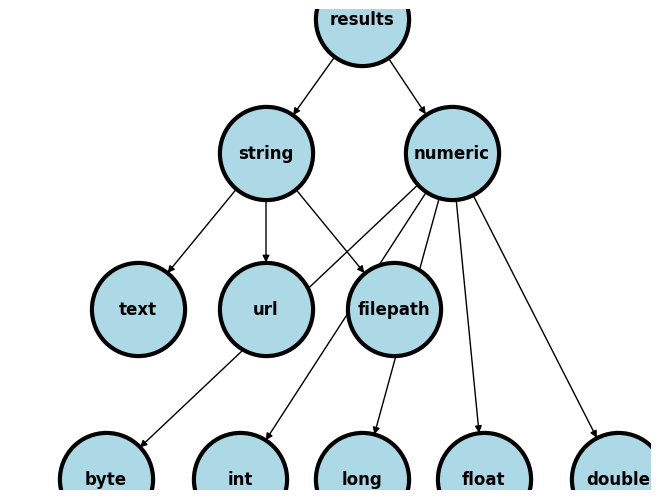

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("results", pos = (500,960))
G.add_node("string", pos = (-1000, 400) )
G.add_node("numeric", pos = (1900, 400) )
G.add_node("text", pos = (-3000, -250) )
G.add_node("url", pos = (-1000, -250) )
G.add_node("filepath", pos = (1000, -250) )
G.add_node("long", pos = (500, -960))
G.add_node("int", pos = (-1400, -960))
G.add_node("byte", pos = (-3500, -960))
G.add_node("float", pos = (2400, -960))
G.add_node("double", pos = (4500, -960))
G.add_edges_from([ ("results","string")])
G.add_edges_from([("string", "text"),("string", "url") ,("string", "filepath")])
G.add_edges_from([("numeric","byte"),("numeric","float"),("numeric","double"),("numeric","int")])
G.add_edges_from([("numeric","long"),("results","numeric")])

nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()


   + Embed
      + Results window
      + Graph
      + File: excel, log, dta, word, [html](dyndoc.md), etc.

   + Publish/[Markup](https://en.wikipedia.org/wiki/Markup_language)
      + Self (e.g., GitHub)
      + Journal (e.g. JAMA)
      + Commercial (e.g. Pfizer Ad)


Let's use a simple example to illustrate some of the terms we've introduced:

+ Menu 
   + file > example datasets > lifeexp.dta > use
   + `sysuse lifeexp.dta`
   + `webuse lifeexp.dta`
   + `use https://www.stata-press.com/data/r8/lifeexp.dta`    


+ do file
   + Importing data
   + Exploring data 
   + Analyzing data
   + Outputing results
       
+ ado file
   + basis of Stata commands
+ etc.

## 1.3 Directories, file system navigation, path management

Consider the following syntax:

```stata
sysuse lifeexp.dta 
```

It's a portmanteau of "system" & "use lifeexp.dta" (look out for other portmanteau's in Stata)

```stata

. sysuse lifeexp.dta
(Life expectancy, 1998)
```

Now lets save this dataset locally:

```stata
save, replace
```

```stata
. save, replace 
file /Applications/Stata/ado/base/l/lifeexp.dta saved

. 

```

I'm unhappy with Stata 18 - it saves to the last directory you visited! Thats a systems folder!! So I'll use a [Unix](https://jhufena.github.io/home/act5/act_5_0/act_5_0_3.html) command to move this file to a safer place (Stata accepts [some](https://mally.stanford.edu/~sr/computing/basic-unix.html) Unix commands, not this one):

```stata
. mv /Applications/Stata/ado/base/l/lifeexp.dta  /users/d/desktop/lifeexp.dta
command mv is unrecognized
r(199);
`
. 

```

After copying & pasting the above output into GPT-4, here what I got:

   > It looks like you're trying to move a file using Stata's command line, which isn't directly possible since Stata does not recognize system commands like `mv`. Stata's command interface is designed for statistical analysis and data management within its environment, not for managing files on your operating system.

   > To move a file like `lifeexp.dta` from one directory to another on your system, you'll need to use the command line or terminal outside of Stata. If you're using macOS or Linux, you were on the right track with the `mv` command, just not within Stata. If you're on Windows, you'd use `move` instead.

   > Here’s how you can do it:

### On macOS or Linux:
1. Open Terminal.
2. Use the `mv` command as you tried, without the period at the beginning and outside of Stata:
   ```shell
   mv /Applications/Stata/ado/base/l/lifeexp.dta /Users/d/Desktop/lifeexp.dta
   ```
   Make sure to adjust the paths if they're not exactly as you've mentioned. Also, note that it’s `/Users/` with an uppercase 'U', assuming 'd' is your username on the machine.

### On Windows:
1. Open Command Prompt.
2. Use the `move` command:
   ```cmd
   move C:\Path\To\Stata\ado\base\l\lifeexp.dta C:\Users\d\Desktop\lifeexp.dta
   ```
   Again, replace the paths with the correct ones for your system.

Remember, these commands are executed outside of Stata, in your system's native command line interface. If you're often moving files around for Stata analysis, consider creating a [script](https://jhufena.github.io/home/act5/act_5_0/act_5_0_2.html) to [automate](https://jhufena.github.io/home/act5/act_5_0/act_5_0_1.html) this, or better yet, organize your projects in a way that minimizes the need to move files around frequently.

Lastly, a gentle opinion: diving into command line operations can be incredibly empowering. It opens up a world of efficiency and control over your computing environment that GUIs can't match. Plus, it's a skill that, once developed, is universally applicable across many tasks beyond just data management. Embrace the command line, and it will serve you well!

#### Heeding GPTs advice on my Mac

```bash
Last login: Thu Mar 21 02:25:20 on console
d@Poseidon ~ % mv /Applications/Stata/ado/base/l/lifeexp.dta /Users/d/Desktop/lifeexp.dta

```

It worked!

Now we have several ways of reading in the same data. To recap:


1. Locally with filepath

```stata
use /Users/d/Desktop/lifeexp.dta
```

```stata
. use /Users/d/Desktop/lifeexp.dta
(Life expectancy, 1998)

. 

```

2. Without filepath

```stata
use lifeexp.dta
```

```stata
. use lifeexp.dta
file lifeexp.dta not found
r(601);

. 

```

3. From systems memory

```stata
sysuse lifeexp.dta, clear
```

```stata
. sysuse lifeexp.dta
file "lifeexp.dta" not found
r(601);


```

`Warning!!!` We just corrupted a system file. well, we moved it away from its native location.

Use of Terminal (MacOS, Linux) or Command Prompt (Windows) is very empowering. However, its potentially a weapon of mass destruction. We'll leave the command prompt to the 340.800 Stata Programming III (Advanced) class.

4. Import from online

```stata
webuse lifeexp.dta
```

```stata
. webuse lifeexp
(Life expectancy, 1998)
```

5. See what happens when Wi-Fi disconnected 

```stata
webuse lifeexp.dta
```

```stata
. webuse lifeexp
host not found
r(631);
```

6. Explicitly use a URL

```stata
https://www.stata-press.com/data/r8/lifeexp.dta
```

```stata
. webuse lifeexp
(Life expectancy, 1998)
```


For your homework, you're going to do something akin to approach `#6`

## 1.4 Syntax

A few commands are useful on their own: 

```stata
chelp
pwd
```

To name but a few. But the vast majority of commands will only work in context of the appropriate syntax. In this example below, the command `clear` is useful on its own. But `set` only becomes useful with additional syntax. Here we have `obs 1000`, instructing Stata to create an empty dataset with 1000 observations. The command `generate` with syntax `bmi=rnormal(28,5)` then instructs Stata to create a new variable `bmi` in a simulation of a random sampling process with replacement, 1000 times over, from a population with mean bmi of 28 and standard deviation of 5. Stata is then instructed to create a histogram of these simulated bmi sample and save the figure as a .PNG image. Hopefully this clarifies what a Stata command is and what syntax is. Together these make up Stata code.    

```stata
 clear 
 set obs 1000
 generate bmi=rnormal(28,5)
 histogram bmi, normal
 graph export bmi.png, replace 
```

```stata

.  clear 

.  set obs 1000
Number of observations (_N) was 0, now 1,000.

.  generate bmi=rnormal(28,5)

.  histogram bmi, normal
(bin=29, start=13.457429, width=.99248317)

.  graph export bmi.png, replace 
file /Users/d/Desktop/bmi.png saved	as	PNG	format

. 
end of do-file

. 
```

![](bmi.png)

In the above example the very first `valid` word is a command and is rendered blue on my machine but purple in this book. If you type any random word that has no corresponding ado-file, you'll get an error message. Notice also that since its not a native Stata command, it appears black (or white), but not purple.


## 1.5 Counterfeiting

In anticipation of collecting or securing data that might be central to a project, a sophisticated analyst may experiment with creating Data that mimic these real databases to refine your Stata scripts. 

We'll walk through a simple simulation to whet your appetite, and lay a foundation for our more distant goals.

Let's take an example from the following Stata script that was inspired by [Clinical Trial Data](https://www.nejm.org/doi/full/10.1056/nejmoa2034577) from the BNT162b2 mRNA Covid-19 Vaccine 

```stata

qui {
	clear 
	cls
	if c(N) { //background
		inspired by polack et al. nejm 2020
		NEJM2020;383:2603-15
		lets do some reverse engineering
		aka simulate, generate data 
		from results: reversed process!!
	}
	if c(os)=="Windows" { //methods
	    global workdir "`c(pwd)'\"
	}
	else {
	    global workdir "`c(pwd)'/"
	}
	capture log close
	log using ${workdir}simulation.log, replace 
	set seed 340600
	set obs 37706
	}
	if c(N)==37706 { //simulation 
	    #delimit ; 
		//row1
		g bnt=rbinomial(1,.5);
		lab define Bnt 
		    0 "Placebo"  
	        1 "BNT162b2" ;
		label values bnt Bnt ;
		tab bnt ; 
		//row2
		gen female=rbinomial(1, .494); 
		label define Female  
		    0 "Male"  
			1 "Female"; 
		label values female Female; 
		tab female;
		//row3 
		tempvar dem ;
		gen `dem'=round(runiform(0,100),.1); 
		recode `dem'  
		    (0/82.9=0)  
		    (83.0/92.1=1)  
		    (92.2/96.51=2)   
		    (96.52/97.0=3)  
		    (97.1/97.2=4)  
		    (97.3/99.41=5)  
		    (99.42/100=6)  
		         , gen(race);
		lab define Race  
			0 "White"    
		    1 "Black or African American" 
			2 "Asian" 
			3 "Native American or Alsak Native"  
			4 "Native Hawaiian or other Pacific Islander"  
			5 "Multiracial"  
			6 "Not reported"; 
		label values race Race; 
		tab race;
		//row4 
		gen ethnicity=rbinomial(1,0.28);
		tostring ethnicity, replace;
		replace ethnicity="Latinx" if ethnicity=="1";
		replace ethnicity="Other" if ethnicity=="0";
		//row5 
		tempvar country;
		gen `country'=round(runiform(0,100), .1);
		recode `country'   
		    (0/15.3=0)  
			(15.4/21.5=1)  
			(21.6/23.6=2)  
			(23.7/100=3) 
			    , gen(country) ;
		label define Country 
			0 "Argentina"  
		    1 "Brazil"  
			2 "South Africa"  
			3 "United States"; 
		label values country Country; 
		tab country;
		//row7 
		gen age=(rt(_N)*9.25)+52 ; 
		replace age=runiform(16,91)  
		    if !inrange(age,16,91); 
		summ age, d ;
		local age_med=r(p50); local age_lb=r(min); local age_ub=r(max);
		gen dob = d(27jul2020) -  
		          (age*365.25) ; 
		gen dor = dob + age*365.25 + runiform(0,4*30.25); 
		//row6 
		gen over55=age>55 ; tab over55;
		//row8 
		gen bmi=rbinomial(1, .351); tab bmi; 
		//figure 3 
		g days=rweibull(.7,17,0) if bnt==0 ;
		g covid=rbinomial(1, 162/21728) if bnt==0 ; 
		replace days=rweibull(.4,.8,0) if bnt==1 ;
		replace covid=rbinomial(1, 14/21772) if bnt==1; 
		//key dates 
		gen eft = dor + days;
		//date formats
		format dob %td; format dor %td; format eft %td;
		 //kaplan-meier curve
		 stset days, fail(covid) ;
		 sts graph,  
		    by(bnt)  
		    fail per(100)  
		    tmax(119)  
		    xlab(0(7)119) 
		    ylab(0(.4)2.4, 
		        angle(360)    
			    format("%3.1f")
				)  
		    xti("Days after Dose 1")  
		    legend(off) 
		    text(
			    2.3 100 
			    "Placebo",  
			     col(navy)
				 )  
		    text(
			    .5 100 
				"BNT162b2",  
			    col(maroon)
				) ;
		graph export BNT162b2.png, replace ;
		stcox bnt ;
		drop _* age over55 days ;
		g bnt_id=round(runiform(37,37+_N)) ;
		compress  ;
		#delimit cr
		//label variables
		lab var bnt_id "Participant Identifier"
		lab var bnt "Random treatment assignment"
		lab var female "Gender at birth"
		lab var race "Self-identified race"
		lab var ethnicity "Hispanic ethnicity"
		lab var country "Country where trial was conducted"
		lab var dob "Date of birth"
		lab var dor "Date of recruitment into BNT162b2 trial"
		lab var eft "Date of exit from BNT162b2 trial"
		lab var bmi "Obese"
		lab var covid  "Covid-19 status on eft date"
		//label data
		lab data "Safety and Efficacy of the BNT162b2 mRNA Covid-19 Vaccine"
		describe
		order bnt_id dob female race ethnicity country bmi bnt eft covid 
		*replace eft=. if eft>d(15dec2020) //some folks lost to followup
		save BNT162b2, replace 

}
  
log close 

	
```



### Detailed Breakdown of Clinical Trial Data Simulation: [BNT162b2 mRNA Covid-19 Vaccine](https://www.nejm.org/doi/full/10.1056/nejmoa2034577)

### Introduction

In this module, we explore the nuances of simulating a dataset for a randomized clinical trial, specifically modeled after the BNT162b2 mRNA COVID-19 vaccine trial. Our objective is to create a simulated dataset that mirrors <u>only some aspects</u> of the complexity and diversity of the actual trial, such as participant demographics, vaccine efficacy, and follow-up times.

#### 1.5.1 Simulation Process

#### 1.5.2 Preparing the Environment
Initial steps include setting up the working directory and logging all commands for reproducibility.
```stata
clear
set seed 340600  // Ensures reproducibility
set obs 37706  // Matches the trial size
```

#### 1.5.3 Random Treatment Assignment
Simulate a 1:1 allocation to the vaccine or placebo group.
```stata
generate bnt=rbinomial(1,.5)
label define Bnt 0 "Placebo" 1 "BNT162b2"
label values bnt Bnt
tabulate bnt
```

#### 1.5.4 Demographic Characteristics
We simulate key demographics including gender, race, ethnicity, and country, adhering to the trial's reported distributions.
- **Gender**: Reflects the nearly balanced gender distribution in the trial.
    ```stata
    generate female=rbinomial(1, .494)
    ```
- **Race**: Simulates the racial diversity among participants.
    ```stata
    generate race=round(runiform(0,100),.1)
    ````
- **Ethnicity and Country**: Captures the ethnic background and the geographic diversity of the trial population.
    ```stata
    generate ethnicity=rbinomial(1,0.28)
    generate country=round(runiform(0,100), .1)
    ```

#### 1.5.5 Age Distribution
Age is a critical factor in vaccine trials, affecting both efficacy and safety profiles.
```stata
generate age=(rt(_N)*9.25)+52
```

#### 1.5.6 Clinical Outcomes
Simulate the time until a COVID-19 event (infection) occurs post-vaccination, differentiating between vaccine and placebo groups to reflect the vaccine's efficacy.
```stata
generate days=rweibull(.7,17,0) if bnt==0
```

#### 1.5.7 Follow-Up and BMI
These variables simulate additional health and trial participation factors, such as BMI and the duration of each participant's follow-up.
```stata
generate bmi=rbinomial(1, .351)
```

#### 1.5.8 Analysis
Perform a Kaplan-Meier survival analysis and a Cox proportional hazards model to analyze the simulated data's safety and efficacy signals.
```stata
sts graph, by(bnt)
stcox bnt
```

![](simulate.png)


#### 1.5.9 Data Labeling and Export
Final steps involve labeling each variable for clarity and exporting the dataset for further analysis.
```stata
label variable bnt_id "Participant Identifier"
```

## 1.6 Lab
1. **Simulate Demographic Data**: Extend the simulation to include detailed demographic & clinical characteristics of your choice (see the script above for tips). Analyze how different demographics might influence trial outcomes. Can you produce a Table 1 after simulating your study population? Does it meet your expectations?
2. **Outcome Analysis**: Utilize the simulated outcome data to perform a Kaplan-Meier analysis. Discuss how the vaccine's efficacy may vary among subgroups. How would you take this into consideration when simulating these data?  


**Conclusion**
Through this simulation, you'll gain some insights into how these methods can be used to plan for data collection, sample size calculation, or, as we'll soon see, `overcome barriers when data access is highly restricted`. This exercise not only reinforces statistical and programming skills but also emphasizes the critical thinking needed to interpret data.


## 1.7 Homework  

Your week 1 homework is very simple:
1. Create a GitHub account and a "public" repository within it called hw1.
2. Upload a .do file to this repo with code that reproduces the simulation and results above. Be sure to annotate your code.
3. Run your simulation on your computer using the `URL` of your "raw" .do file (instructions will be provided in class).

Question: 

What syntax did you use to run this "remote" .do file? Copy and paste that syntax into a .do file named `hw1.lastname.firstname.do`. And that's it! 

<iframe width="560" height="315" src="https://www.youtube.com/embed/Ih2z2HrNmFA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
